In [1]:
# import data manipulation libraries
import pandas as pd
import numpy as np

# import data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_ticket_data.csv')

In [3]:
df.head()

,Unnamed: 0,origin,destination,departure,duration,vehicle_type,vehicle_class,price,fare
0,42,MADRID,BARCELONA,2019-05-18 20:30:00,3.17,AVE,Turista Plus,69.80,Promo
1,43,MADRID,BARCELONA,2019-05-18 06:20:00,3.15,AVE,Turista,66.75,Promo
2,44,MADRID,BARCELONA,2019-05-18 07:30:00,3.17,AVE,Turista,85.10,Promo
3,45,MADRID,BARCELONA,2019-05-18 07:30:00,3.17,AVE,Turista,85.10,Promo
4,46,MADRID,BARCELONA,2019-05-18 09:30:00,3.07,AVE,Turista,85.10,Promo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525950 entries, 0 to 1525949
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1525950 non-null  int64  
 1   origin         1525950 non-null  object 
 2   destination    1525950 non-null  object 
 3   departure      1525950 non-null  object 
 4   duration       1525950 non-null  float64
 5   vehicle_type   1525950 non-null  object 
 6   vehicle_class  1525642 non-null  object 
 7   price          1458886 non-null  float64
 8   fare           1525642 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 104.8+ MB


### Check the variable types and change the object data types to category and the departure column to datetime64. Changing object to category generally saves significant memory, while casting departure as datetime64 makes possible to use datetime functions

In [5]:
df = pd.read_csv('train_ticket_data.csv',
                parse_dates=['departure'],
                dtype={
                    'origin': 'category',
                    'destination': 'category',
                    'vehicle_type': 'category',
                    'vehicle_class': 'category',
                    'fare': 'category'
                    }
                ).drop('Unnamed: 0', axis=1)

In [6]:
df.head()

,origin,destination,departure,duration,vehicle_type,vehicle_class,price,fare
0,MADRID,BARCELONA,2019-05-18 20:30:00,3.17,AVE,Turista Plus,69.80,Promo
1,MADRID,BARCELONA,2019-05-18 06:20:00,3.15,AVE,Turista,66.75,Promo
2,MADRID,BARCELONA,2019-05-18 07:30:00,3.17,AVE,Turista,85.10,Promo
3,MADRID,BARCELONA,2019-05-18 07:30:00,3.17,AVE,Turista,85.10,Promo
4,MADRID,BARCELONA,2019-05-18 09:30:00,3.07,AVE,Turista,85.10,Promo


In [7]:
missing_values_percent = df.isna().mean().round(4) * 100

print(missing_values_percent)

origin           0.00
destination      0.00
departure        0.00
duration         0.00
vehicle_type     0.00
vehicle_class    0.02
price            4.39
fare             0.02
dtype: float64


In [8]:
price_mean = df['price'].mean()
df['price'].fillna(price_mean, inplace=True)

In [9]:
missing_values_percent = df.isna().mean().round(4) * 100

print(missing_values_percent)

origin           0.00
destination      0.00
departure        0.00
duration         0.00
vehicle_type     0.00
vehicle_class    0.02
price            0.00
fare             0.02
dtype: float64


In [10]:
from pandas.api.types import CategoricalDtype

# created ordered category for weekday. integer dayofweek is ok, but less helpful for customers

cat_type = CategoricalDtype(
    categories=[
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday',
        'Sunday'
    ],
    ordered=True)

# Create departure, day_of_week, and hour columns

df = df.assign(
    arrival = df['departure'] + pd.to_timedelta(df['duration'], unit='H'),
    departure_dayofweek = (df['departure'].dt.day_name().astype(cat_type)),
    departure_hour = df['departure'].dt.hour,
    vehicle_category = (df['vehicle_type']
                       .map({'AVE': 'High-Speed',
                            'AVE-TGV': 'High-Speed',
                            'R. EXPRES': 'Standard',
                            'LD-AVE': 'Standard',
                            'AVE-LD': 'Standard',
                            'MD-AVE': 'Standard',
                            'LD-MD': 'Standard'
                            })
                       )
)

In [11]:
df.describe().round()

,duration,price,departure_hour
count,1525950.0,1525950.0,1525950.0
mean,3.0,86.0,13.0
std,1.0,22.0,5.0
min,2.0,41.0,5.0
25%,2.0,75.0,8.0
50%,3.0,85.0,13.0
75%,3.0,100.0,17.0
max,11.0,235.0,21.0


In [12]:
df.loc[df['price'] == df['price'].max()]

,origin,destination,departure,duration,vehicle_type,vehicle_class,price,fare,arrival,departure_dayofweek,departure_hour,vehicle_category
1524831,BARCELONA,MADRID,2019-05-31 12:50:00,2.92,AVE-TGV,Preferente,235.3,Flexible,2019-05-31 15:45:12,Friday,12,High-Speed
1524852,BARCELONA,MADRID,2019-05-31 12:50:00,2.92,AVE-TGV,Preferente,235.3,Flexible,2019-05-31 15:45:12,Friday,12,High-Speed


In [13]:
df.loc[df['price'] == df['price'].min()]

,origin,destination,departure,duration,vehicle_type,vehicle_class,price,fare,arrival,departure_dayofweek,departure_hour,vehicle_category
1416363,BARCELONA,MADRID,2019-05-28 21:15:00,2.78,AVE,Turista,40.93,Promo,2019-05-29 00:01:48,Tuesday,21,High-Speed
1416383,BARCELONA,MADRID,2019-05-28 21:15:00,2.78,AVE,Turista,40.93,Promo,2019-05-29 00:01:48,Tuesday,21,High-Speed
1419884,BARCELONA,MADRID,2019-05-28 21:15:00,2.78,AVE,Turista,40.93,Promo,2019-05-29 00:01:48,Tuesday,21,High-Speed
1419913,BARCELONA,MADRID,2019-05-28 21:15:00,2.78,AVE,Turista,40.93,Promo,2019-05-29 00:01:48,Tuesday,21,High-Speed


In [14]:
df.query("origin == 'MADRID'").price.mean()

86.0253938262045

In [15]:
df.query("origin == 'BARCELONA'").price.mean()

86.32774812127282

### Build a dual axis line chart with the number of total riders as one line and total revenue as the other

In [16]:
train_summary = (df
    .groupby(df['departure'].dt.date)
    .agg(
        ridership = ('price', 'count'),
        total_fare = ('price', 'sum'),
        )             
).reset_index()

In [17]:
train_summary.head()

,departure,ridership,total_fare
0,2019-05-01,29634,2.407501e+06
1,2019-05-02,29722,2.216012e+06
2,2019-05-03,33902,3.057151e+06
3,2019-05-04,24042,2.051886e+06
4,2019-05-05,33358,3.408973e+06


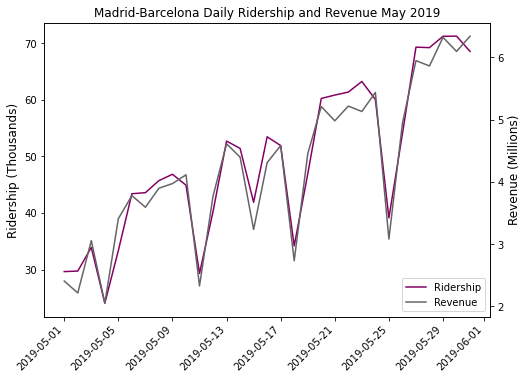

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
 
ax.set_title("Madrid-Barcelona Daily Ridership and Revenue May 2019")
 
ax.plot(
    train_summary["departure"], 
    train_summary["ridership"] / 1000, # divide by thousands to change units
    c="#830065",
    label="Ridership"
)
ax.set_ylabel("Ridership (Thousands)", fontsize=12)
 
ax2 = ax.twinx()
 
ax2.plot(
    train_summary["departure"], 
    train_summary["total_fare"] / 1000000, # divide by millions to change units
    c="#666366",
    label="Revenue"
)
ax2.set_ylabel("Revenue (Millions)", fontsize=12)
 
fig.autofmt_xdate(rotation=45)
fig.legend(bbox_to_anchor=(.9, .3))
 
plt.show()

### Build a bar chart of average ridership by day of week and departure location to visualize this. Determine if one route is always busier or if it depends on the weekday

In [19]:
df_ridership_origin = (df
                    .groupby(['departure_dayofweek', 'origin'])
                    .agg(ridership = ('price', 'count'))
                      ).reset_index()
df_ridership_origin.head()

,departure_dayofweek,origin,ridership
0,Monday,MADRID,121894
1,Monday,BARCELONA,103830
2,Tuesday,MADRID,120652
3,Tuesday,BARCELONA,104486
4,Wednesday,MADRID,134070


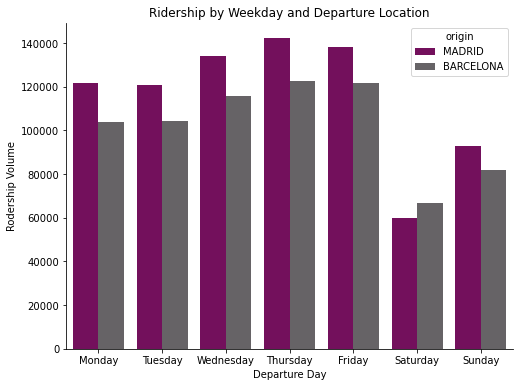

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    data=df_ridership_origin,
    x='departure_dayofweek',
    y='ridership',
    hue='origin',
    palette=['#830065', '#666366']
).set(
    title='Ridership by Weekday and Departure Location',
    xlabel='Departure Day',
    ylabel='Rodership Volume'
)

sns.despine()

### It's time to produce the customer facing information to help them better plan their trips.

In [21]:
train_summary = (
    df
    .groupby('vehicle_category')
    .agg(
        average_fare = ('price', 'mean'),
        average_duration = ('duration', 'mean')
    )
)

train_summary.head()

,average_fare,average_duration
vehicle_category,,
High-Speed,87.579839,2.820042
Standard,52.551600,8.656502


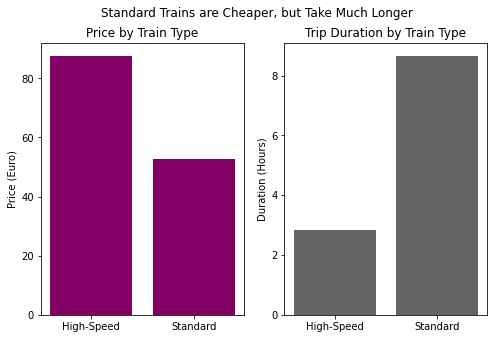

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))
 
fig.suptitle("Standard Trains are Cheaper, but Take Much Longer")
 
ax[0].bar(
    x=train_summary.index, 
    height=train_summary["average_fare"],
    color="#830065",
)
 
ax[0].set_title("Price by Train Type")
ax[0].set_ylabel("Price (Euro)")
 
ax[1].bar(
    x=train_summary.index, 
    height=train_summary["average_duration"],
    color="#666366",
)
 
ax[1].set_title("Trip Duration by Train Type")
ax[1].set_ylabel("Duration (Hours)")
 
plt.show()

### Build a heatmap of average price with day of week as columns and time of day as rows. Use it to determine which days and departure times have the lowest prices. Then, export the summary table used to build the heatmap to a flat file format of your choice.

In [23]:
heatmap = df.pivot_table(
    index='departure_hour',
    columns='departure_dayofweek',
    values='price',
    aggfunc='mean'
)

heatmap

departure_dayofweek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
departure_hour,,,,,,,
5,74.034847,65.928050,65.500863,60.959099,56.124479,NaN,99.343750
6,82.217256,79.918440,72.787755,73.395093,73.241592,81.204057,63.096351
7,92.326191,84.824078,82.061914,82.232304,73.559622,82.181231,71.218427
8,93.360223,88.066147,84.775947,83.980548,88.720386,87.573724,80.479492
9,81.333615,78.410293,77.809627,76.448789,74.828570,75.213226,75.487072
10,87.273728,85.064085,86.050375,85.796461,82.940844,82.402183,92.673254
11,97.321736,83.772128,90.717297,75.739495,87.482366,85.242815,98.741375
12,97.266229,83.469421,88.624808,83.442460,95.364831,85.515515,96.290376
13,88.830816,81.028920,82.591792,70.445740,91.870654,87.685037,95.520753


In [25]:
heatmap_saturday_mean = heatmap['Saturday'].mean()
heatmap['Saturday'].fillna(heatmap_saturday_mean, inplace=True)

In [26]:
heatmap

departure_dayofweek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
departure_hour,,,,,,,
5,74.034847,65.928050,65.500863,60.959099,56.124479,79.716449,99.343750
6,82.217256,79.918440,72.787755,73.395093,73.241592,81.204057,63.096351
7,92.326191,84.824078,82.061914,82.232304,73.559622,82.181231,71.218427
8,93.360223,88.066147,84.775947,83.980548,88.720386,87.573724,80.479492
9,81.333615,78.410293,77.809627,76.448789,74.828570,75.213226,75.487072
10,87.273728,85.064085,86.050375,85.796461,82.940844,82.402183,92.673254
11,97.321736,83.772128,90.717297,75.739495,87.482366,85.242815,98.741375
12,97.266229,83.469421,88.624808,83.442460,95.364831,85.515515,96.290376
13,88.830816,81.028920,82.591792,70.445740,91.870654,87.685037,95.520753


<AxesSubplot:title={'center':'Ticket Price per Day and Time(Hour)'}, xlabel='departure_dayofweek', ylabel='departure_hour'>

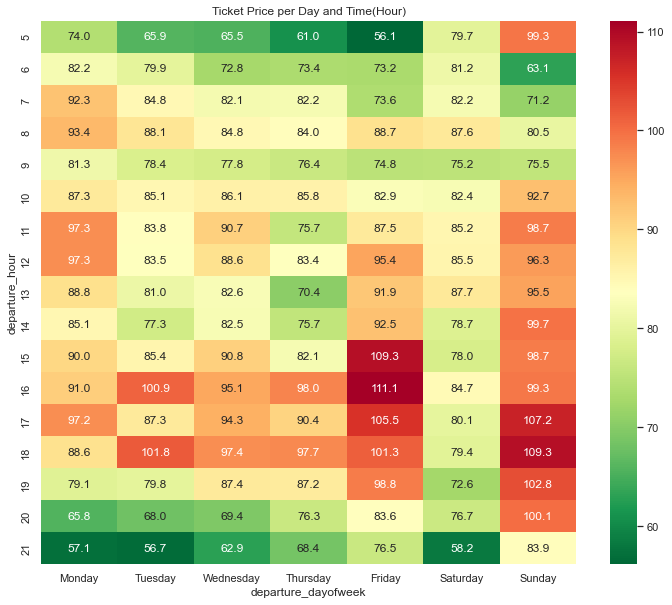

In [27]:
sns.set (rc = {'figure.figsize':(12, 10)})
ax = plt.axes()
ax.set_title('Ticket Price per Day and Time(Hour)')
sns.heatmap(data=heatmap, ax = ax, annot=True, fmt='.1f', cmap='RdYlGn_r')

In [28]:
heatmap.to_csv('price_heatmap.csv')